# 📘 Applied Machine Learning - Week 2

**Machine Learning Fundamentals: Logistic Regression, Nearest Neighbors, and Decision Trees**

---

## 📚 Overview

This assignment introduces fundamental machine learning algorithms. You'll implement logistic regression, nearest neighbors, and decision trees using **NumPy** only.

## 📑 Table of Contents

1. [**Logistic Regression**](#1.-Logistic-Regression)
   - [1.1 Linear Mapping](#1.1-Linear-Mapping)
   - [1.2 Sigmoid](#1.2-Sigmoid)
   - [1.3 Negative Log Likelihood](#1.3-Negative-Log-Likelihood)
   - [1.4 Model](#1.4-Model)
   - [1.5 Simple Experiment](#1.5-Simple-Experiment)
2. [**Nearest Neighbors**](#2.-Nearest-Neighbors)
   - [2.1 Distance to Training Samples](#2.1-Distance-of-input-to-training-samples)
   - [2.2 Predicting a Label](#2.2-Predicting-a-label)
   - [2.3 Experiment](#2.3-Experiment)
3. [**Decision Tree**](#3.-Decision-Tree)
   - [3.1 Entropy & Data Split](#3.1-Entropy-&-Data-Split)
   - [3.2 Terminal Node](#3.2-Terminal-Node)
   - [3.3 Build the Decision Tree](#3.3-Build-the-Decision-Tree)
4. [**Experiments**](#4.-Experiments)
   - [4.1 Decision Tree for Heart Disease Prediction](#4.1-Decision-Tree-for-Heart-Disease-Prediction)
   - [4.2 Nearest Neighbors for Heart Disease Prediction](#4.2-Nearest-Neighbors-for-Heart-Disease-Prediction)
   - [4.3 Logistic Regression for Heart Disease Prediction](#4.3-Logistic-Regression-for-Heart-Disease-Prediction)

---

### 📝 Note

Some concepts below may not have been covered in lectures yet. These will be discussed in upcoming sessions.

### 🎯 Before You Begin

To verify your code, we use **automark**. You're registered with your student number as your username.

In [ ]:
import automark as am

# fill in you student number as your username
username = "16354842"

# to check your progress, you can run this function
am.get_progress(username)

| Current Assignment Grade 17%              |
| w1_L2_regression         | completed      |
| w1_cal_pseudoinverse     | completed      |
| w1_linear_forward        | completed      |
| w2_dist_to_training_samples| not attempted  |
| w2_linear_forward        | completed      |
| w2_linear_grad_W         | not attempted  |
| w2_linear_grad_b         | not attempted  |
| w2_nearest_neighbors     | not attempted  |
| w2_nll_forward           | not attempted  |
| w2_nll_grad_input        | not attempted  |
| w2_sigmoid_forward       | not attempted  |
| w2_sigmoid_grad_input    | not attempted  |
| w2_tree_split_data_left  | not attempted  |
| w2_tree_split_data_right | not attempted  |
| w2_tree_to_terminal      | not attempted  |
| w2_tree_weighted_entropy | not attempted  |
| w3_box_blur              | not attempted  |
| w3_conv_matrix           | not attempted  |
| w3_dense_forward         | not attempted  |
| w3_flatten_forward       | not attempted  |
| w3_l2_regularizer        | not

### ✅ Progress Tracking

Initially, all tests show 'not attempted'. By the end of this notebook, you should complete all week 2 tests. Example output:

```
---------------------------------------------
| Your name / student number                |
| your_email@your_domain.whatever           |
---------------------------------------------
| Current Assignment Grade  0%              |
---------------------------------------------
| w2_linear_forward        | not attempted  |
| w2_linear_grad_W         | not attempted  |
| w2_linear_grad_b         | not attempted  |
| w2_nll_forward           | not attempted  |
| w2_nll_grad_input        | not attempted  |
| w2_sigmoid_forward       | not attempted  |
| w2_sigmoid_grad_input    | not attempted  |
| w2_dist_to_training_samples | not attempted  |
| w2_nearest_neighbors     | not attempted  |
| w2_tree_weighted_entropy | not attempted  |
| w2_tree_split_data_left  | not attempted  |
| w2_tree_split_data_right | not attempted  |
| w2_tree_to_terminal      | not attempted  |
---------------------------------------------
```

### ⚠️ Important Note

**Multi-week tracking:** The `am.get_progress(username)` function checks weeks 1, 2, and 3. 

- **Week 2 exercises** (this notebook): Linear forward, Linear dW, Linear db, Sigmoid forward, Sigmoid grad, NLL forward, NLL grad, Distance to training samples, Nearest neighbors, Tree entropy, Tree left split, Tree right split, Tree terminal
- **Week 1 and 3** exercises appear in their respective notebooks
- Don't worry if week 1 or 3 tests remain "not attempted" - focus on week 2 for now
- All statuses should show "completed" when you finish all three weeks

In [ ]:
from __future__ import (
    print_function,
    absolute_import,
    division,
)  # You don't need to know what this is.
import numpy as np  # this imports numpy, which is used for vector- and matrix calculations

### 💡 About Classes in Python

This notebook uses **classes** and **instances** (already implemented). This makes code cleaner and more readable.

**Learning resources:**
- [Official Python Documentation](https://docs.python.org/3/tutorial/classes.html) 
- Video: [Object Oriented Programming Introduction](https://www.youtube.com/watch?v=ekA6hvk-8H8) by *sentdex*
- Advanced: [Stop Writing Classes](https://www.youtube.com/watch?v=o9pEzgHorH0) - OOP antipatterns

## 1. Logistic Regression

---

### 📐 Introduction

**Logistic Regression** is a generalized linear model for binary (2-class) classification.

- Can be extended to multi-class and non-linear cases
- We focus on the simplest binary case here

**The Problem:**
Given data with 2 classes (Class 0 and Class 1), logistic regression returns a probability value in [0, 1] representing the likelihood of belonging to Class 1.

**Decision Boundary:**
The set of points where prediction = 0.5 forms a line (in 2D) or hyperplane (in higher dimensions) that separates the classes.

![Linear Separability](https://nlpforhackers.io/wp-content/uploads/2018/07/Linear-Separability-610x610.png)

### 🧮 Mathematical Formulation

**Model Parameters:**
- Weight vector **W**
- Bias **b**

**Prediction for feature vector X:**

$$
f(X) = \frac{1}{1 + \exp(-[XW + b])} = \sigma(h(X))
$$

where:
- $\sigma(z) = \frac{1}{1 + \exp(-z)}$ (sigmoid function)
- $h(X) = XW + b$ (linear transformation)

**Training Objective:**
Fit W and b by minimizing the **Negative Log-Likelihood (NLL)** on training data $\{X_j, Y_j\}_{j=1}^N$:

$$
\mathcal{L} = -\frac{1}{N}\sum_j \log\Big[ f(X_j)^{Y_j} \cdot (1-f(X_j))^{1-Y_j}\Big]
$$

$$
= -\frac{1}{N}\sum_j \Big[ Y_j\log f(X_j) + (1-Y_j)\log(1-f(X_j))\Big]
$$

### 🔄 Algorithm Steps

**Computing NLL (Forward Pass):**

1. **Linear mapping:** $h = XW + b$
2. **Sigmoid activation:** $f = \sigma(h)$
3. **Calculate NLL:** $\mathcal{L} = -\frac{1}{N}\sum_j \Big[ Y_j\log f_j + (1-Y_j)\log(1-f_j)\Big]$

### 📉 Gradient Descent & Backpropagation

**Optimization via [Gradient Descent (GD)](https://en.wikipedia.org/wiki/Gradient_descent):**

Choose a learning rate $\gamma$ and update parameters after each NLL computation:

$$
W_{\text{new}} = W_{\text{old}} - \gamma \frac{\partial \mathcal{L}}{\partial W}
$$

$$
b_{\text{new}} = b_{\text{old}} - \gamma \frac{\partial \mathcal{L}}{\partial b}
$$

**Computing Gradients via [Backpropagation (BP)](https://en.wikipedia.org/wiki/Backpropagation):**

$$
\frac{\partial\mathcal{L}}{\partial W} = 
\frac{\partial\mathcal{L}}{\partial h} \frac{\partial h}{\partial W} =
\frac{\partial\mathcal{L}}{\partial f} \frac{\partial f}{\partial h} \frac{\partial h}{\partial W}
$$

$$
\frac{\partial\mathcal{L}}{\partial b} = 
\frac{\partial\mathcal{L}}{\partial h} \frac{\partial h}{\partial b} =
\frac{\partial\mathcal{L}}{\partial f} \frac{\partial f}{\partial h} \frac{\partial h}{\partial b}
$$

### 1.1 Linear Mapping

Implement the linear transformation:

$$
h(X) = XW + b
$$

**📝 Note on dimensionality:**
- `n_out` = dimensionality of output (number of predictions per input)
- For logistic regression: `n_out = 1`
- For future assignments: `n_out > 1` (multi-output cases)
- **Tip:** Use **NumPy** operations for generic, dimension-agnostic implementations

In [ ]:
def w2_linear_forward(x_input, W, b):
    """Perform the mapping of the input
    # Arguments
        x_input: input of the linear function - np.array of size `(n_objects, n_in)`
        W: np.array of size `(n_in, n_out)`
        b: np.array of size `(n_out,)`
    # Output
        the output of the linear function
        np.array of size `(n_objects, n_out)`
    """
    output = x_input.dot(W) + b
    return output

### 🧪 Test Case

Let's verify with matrices $X$, $W$, and $b$:

$$
X = \begin{bmatrix}
1 & -1 \\
-1 & 0 \\
1 & 1 \\
\end{bmatrix} \quad
W = \begin{bmatrix}
4 \\
2 \\
\end{bmatrix} \quad
b = \begin{bmatrix}
3 \\
\end{bmatrix}
$$

**Step 1:** Compute $XW$:

$$
XW = \begin{bmatrix}
1 & -1 \\
-1 & 0 \\
1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
4 \\
2 \\
\end{bmatrix} =
\begin{bmatrix}
2 \\
-4 \\
6 \\
\end{bmatrix}
$$

**Step 2:** Add bias $b$:

$$
XW + b = 
\begin{bmatrix}
5 \\
-1 \\
9 \\
\end{bmatrix} 
$$

In [ ]:
X_test = np.array([[1, -1], [-1, 0], [1, 1]])

W_test = np.array([[4], [2]])

b_test = np.array([3])

h_test = w2_linear_forward(X_test, W_test, b_test)
print(h_test)

[[ 5]
 [-1]
 [ 9]]


In [ ]:
# Test the linear forward function
am.test_student_function(username, w2_linear_forward, ["x_input", "W", "b"])

Running local tests...
w2_linear_forward successfully passed local tests
Running remote test...


Test was successful. Congratulations!


### 📊 Computing Gradients

Now implement the partial derivatives with respect to model parameters:

$$
\frac{\partial \mathcal{L}}{\partial W} = 
\frac{\partial \mathcal{L}}{\partial h}
\frac{\partial h}{\partial W}
$$

$$
\frac{\partial \mathcal{L}}{\partial b} = 
\frac{\partial \mathcal{L}}{\partial h}
\frac{\partial h}{\partial b}
$$

In [ ]:
def w2_linear_grad_W(x_input, grad_output, W, b):
    """Calculate the partial derivative of
        the loss with respect to W parameter of the function
        dL / dW = (dL / dh) * (dh / dW)
    # Arguments
        x_input: input of a dense layer - np.array of size `(n_objects, n_in)`
        grad_output: partial derivative of the loss functions with
            respect to the ouput of the dense layer (dL / dh)
            np.array of size `(n_objects, n_out)`
        W: np.array of size `(n_in, n_out)`
        b: np.array of size `(n_out,)`
    # Output
        the partial derivative of the loss
        with respect to W parameter of the function
        np.array of size `(n_in, n_out)`
    """
    grad_W = x_input.T.dot(grad_output)
    return grad_W

In [ ]:
am.test_student_function(username, w2_linear_grad_W, ["x_input", "grad_output", "W", "b"]) 

Running local tests...
w2_linear_grad_W successfully passed local tests
Running remote test...
Test was successful. Congratulations!


In [ ]:
def w2_linear_grad_b(x_input, grad_output, W, b):
    """Calculate the partial derivative of
        the loss with respect to b parameter of the function
        dL / db = (dL / dh) * (dh / db)
    # Arguments
        x_input: input of a dense layer - np.array of size `(n_objects, n_in)`
        grad_output: partial derivative of the loss functions with
            respect to the ouput of the linear function (dL / dh)
            np.array of size `(n_objects, n_out)`
        W: np.array of size `(n_in, n_out)`
        b: np.array of size `(n_out,)`
    # Output
        the partial derivative of the loss
        with respect to b parameter of the linear function
        np.array of size `(n_out,)`
    """
    grad_b = np.sum(grad_output, axis=0)
    return grad_b

In [ ]:
am.test_student_function(
    username, w2_linear_grad_b, ["x_input", "grad_output", "W", "b"]
)

Running local tests...
w2_linear_grad_b successfully passed local tests
Running remote test...
Test was successful. Congratulations!


In [ ]:
am.get_progress(username)

| Current Assignment Grade 26%              |
| w1_L2_regression         | completed      |
| w1_cal_pseudoinverse     | completed      |
| w1_linear_forward        | completed      |
| w2_dist_to_training_samples| not attempted  |
| w2_linear_forward        | completed      |
| w2_linear_grad_W         | completed      |
| w2_linear_grad_b         | completed      |
| w2_nearest_neighbors     | not attempted  |
| w2_nll_forward           | not attempted  |
| w2_nll_grad_input        | not attempted  |
| w2_sigmoid_forward       | not attempted  |
| w2_sigmoid_grad_input    | not attempted  |
| w2_tree_split_data_left  | not attempted  |
| w2_tree_split_data_right | not attempted  |
| w2_tree_to_terminal      | not attempted  |
| w2_tree_weighted_entropy | not attempted  |
| w3_box_blur              | not attempted  |
| w3_conv_matrix           | not attempted  |
| w3_dense_forward         | not attempted  |
| w3_flatten_forward       | not attempted  |
| w3_l2_regularizer        | not

### 1.2 Sigmoid

The **sigmoid function** squashes values to the range [0, 1]:

$$
f = \sigma(h) = \frac{1}{1 + e^{-h}} 
$$

**Properties:**
- Applied **element-wise** (each element independently)
- Doesn't change tensor dimensionality
- Shape-agnostic implementation

In [ ]:
def w2_sigmoid_forward(x_input):
    """sigmoid nonlinearity
    # Arguments
        x_input: np.array of size `(n_objects, n_in)`
    # Output
        the output of sigmoid layer
        np.array of size `(n_objects, n_in)`
    """
    output = 1 / (1 + np.exp(-x_input))
    return output

In [ ]:
am.test_student_function(username, w2_sigmoid_forward, ["x_input"])

Running local tests...
w2_sigmoid_forward successfully passed local tests
Running remote test...
Test was successful. Congratulations!


### 🔙 Sigmoid Gradient (Backpropagation)

Compute the gradient of the loss with respect to sigmoid input:

$$
\frac{\partial \mathcal{L}}{\partial h} = 
\frac{\partial \mathcal{L}}{\partial f}
\frac{\partial f}{\partial h} 
$$

**Deriving** $\frac{\partial f}{\partial h}$:

$$
\frac{\partial f}{\partial h} = 
\frac{\partial \sigma(h)}{\partial h} =
\frac{\partial}{\partial h} \Big(\frac{1}{1 + e^{-h}}\Big)
= \frac{e^{-h}}{(1 + e^{-h})^2}
$$

$$
= \frac{1}{1 + e^{-h}} \cdot \frac{e^{-h}}{1 + e^{-h}}
= f(h) \cdot (1 - f(h))
$$

**Implementation steps:**
1. Calculate $f(h) \cdot (1 - f(h))$ 
2. Multiply element-wise by $\frac{\partial \mathcal{L}}{\partial f}$

In [ ]:
def w2_sigmoid_grad_input(x_input, grad_output):
    """sigmoid nonlinearity gradient.
        Calculate the partial derivative of the loss
        with respect to the input of the layer
    # Arguments
        x_input: np.array of size `(n_objects, n_in)`
        grad_output: np.array of size `(n_objects, n_in)`
            dL / df
    # Output
        the partial derivative of the loss
        with respect to the input of the function
        np.array of size `(n_objects, n_in)`
        dL / dh
    """
    sigmoid = 1 / (1 + np.exp(-x_input))
    grad_input = grad_output * sigmoid * (1 - sigmoid)  
    return grad_input

In [ ]:
am.test_student_function(username, w2_sigmoid_grad_input, ["x_input", "grad_output"])

Running local tests...
w2_sigmoid_grad_input successfully passed local tests
Running remote test...
Test was successful. Congratulations!


### 1.3 Negative Log Likelihood (NLL)

**Loss function:**

$$
\mathcal{L} 
= -\frac{1}{N}\sum_j \Big[ Y_j\log \dot{Y}_j + (1-Y_j)\log(1-\dot{Y}_j)\Big]
$$

where:
- $N$ = number of objects
- $Y_j$ = true label
- $\dot{Y}_j$ = predicted label

In [ ]:
def w2_nll_forward(target_pred, target_true):
    """Compute the value of NLL
        for a given prediction and the ground truth
    # Arguments
        target_pred: predictions - np.array of size `(n_objects, 1)`
        target_true: ground truth - np.array of size `(n_objects, 1)`
    # Output
        the value of NLL for a given prediction and the ground truth
        scalar
    """
    output = -np.mean(
        target_true * np.log(target_pred + 1e-15)
        + (1 - target_true) * np.log(1 - target_pred + 1e-15)
    )
    return output

In [ ]:
am.test_student_function(username, w2_nll_forward, ["target_pred", "target_true"])

Running local tests...
w2_nll_forward successfully passed local tests
Running remote test...
Test was successful. Congratulations!


### 🔙 NLL Gradient

Calculate the partial derivative of NLL with respect to predictions:

$$
\frac{\partial \mathcal{L}}{\partial \dot{Y}}
=
\begin{pmatrix}
\frac{\partial \mathcal{L}}{\partial \dot{Y}_0} \\
\frac{\partial \mathcal{L}}{\partial \dot{Y}_1} \\
\vdots \\
\frac{\partial \mathcal{L}}{\partial \dot{Y}_N}
\end{pmatrix}
$$

**Derivation** (step-by-step for component 0):

$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial \dot{Y}_0} 
&= \frac{\partial}{\partial \dot{Y}_0} \Big(-\frac{1}{N}\sum_j \Big[ Y_j\log \dot{Y}_j + (1-Y_j)\log(1-\dot{Y}_j)\Big]\Big) \\
&= -\frac{1}{N} \frac{\partial}{\partial \dot{Y}_0} \Big(Y_0\log \dot{Y}_0 + (1-Y_0)\log(1-\dot{Y}_0)\Big) \\
&= -\frac{1}{N} \Big(\frac{Y_0}{\dot{Y}_0} - \frac{1-Y_0}{1-\dot{Y}_0}\Big) \\
&= \frac{1}{N} \frac{\dot{Y}_0 - Y_0}{\dot{Y}_0 (1 - \dot{Y}_0)}
\end{align}
$$

**General form** (element-wise operations):

$$
\frac{\partial \mathcal{L}}{\partial \dot{Y}} = \frac{1}{N} \frac{\dot{Y} - Y}{\dot{Y} \odot (1 - \dot{Y})}
$$

In [ ]:
def w2_nll_grad_input(target_pred, target_true):
    """Compute the partial derivative of NLL
        with respect to its input
    # Arguments
        target_pred: predictions - np.array of size `(n_objects, 1)`
        target_true: ground truth - np.array of size `(n_objects, 1)`
    # Output
        the partial derivative
        of NLL with respect to its input
        np.array of size `(n_objects, 1)`
    """
    grad_input = -(target_true / (target_pred + 1e-15) - (1 - target_true) / (1 - target_pred + 1e-15)) / target_pred.shape[0]
    return grad_input

In [ ]:
am.test_student_function(username, w2_nll_grad_input, ["target_pred", "target_true"])

Running local tests...
w2_nll_grad_input successfully passed local tests
Running remote test...
Test was successful. Congratulations!


In [ ]:
am.get_progress(username)

| Current Assignment Grade 43%              |
| w1_L2_regression         | completed      |
| w1_cal_pseudoinverse     | completed      |
| w1_linear_forward        | completed      |
| w2_dist_to_training_samples| not attempted  |
| w2_linear_forward        | completed      |
| w2_linear_grad_W         | completed      |
| w2_linear_grad_b         | completed      |
| w2_nearest_neighbors     | not attempted  |
| w2_nll_forward           | completed      |
| w2_nll_grad_input        | completed      |
| w2_sigmoid_forward       | completed      |
| w2_sigmoid_grad_input    | completed      |
| w2_tree_split_data_left  | not attempted  |
| w2_tree_split_data_right | not attempted  |
| w2_tree_to_terminal      | not attempted  |
| w2_tree_weighted_entropy | not attempted  |
| w3_box_blur              | not attempted  |
| w3_conv_matrix           | not attempted  |
| w3_dense_forward         | not attempted  |
| w3_flatten_forward       | not attempted  |
| w3_l2_regularizer        | not

### 1.4 Model

Below is a complete **LogisticRegressionGD** model using the functions you implemented above.

In [ ]:
class LogsticRegressionGD(object):

    def __init__(self, n_in, lr=0.05):
        super().__init__()
        self.lr = lr
        self.b = np.zeros(
            1,
        )
        self.W = np.random.randn(n_in, 1)

    def forward(self, x):
        self.h = w2_linear_forward(x, self.W, self.b)
        y = w2_sigmoid_forward(self.h)
        return y

    def update_params(self, x, nll_grad):
        # compute gradients
        grad_h = w2_sigmoid_grad_input(self.h, nll_grad)
        grad_W = w2_linear_grad_W(x, grad_h, self.W, self.b)
        grad_b = w2_linear_grad_b(x, grad_h, self.W, self.b)
        # update params
        self.W = self.W - self.lr * grad_W
        self.b = self.b - self.lr * grad_b

### 1.5 Simple Experiment

Let's test logistic regression on synthetic 2D datasets!

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

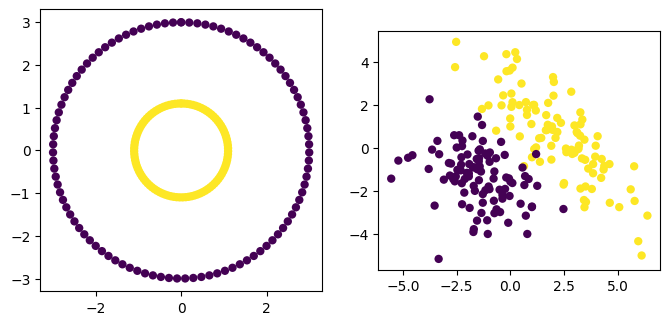

In [ ]:
# Generate some data
def generate_2_circles(N=100):
    phi = np.linspace(0.0, np.pi * 2, 100)
    X1 = 1.1 * np.array([np.sin(phi), np.cos(phi)])
    X2 = 3.0 * np.array([np.sin(phi), np.cos(phi)])
    Y = np.concatenate([np.ones(N), np.zeros(N)]).reshape((-1, 1))
    X = np.hstack([X1, X2]).T
    return X, Y


def generate_2_gaussians(N=100):
    phi = np.linspace(0.0, np.pi * 2, 100)
    X1 = np.random.normal(loc=[1, 2], scale=[2.5, 0.9], size=(N, 2))
    X1 = X1 @ np.array([[0.7, -0.7], [0.7, 0.7]])
    X2 = np.random.normal(loc=[-2, 0], scale=[1, 1.5], size=(N, 2))
    X2 = X2 @ np.array([[0.7, 0.7], [-0.7, 0.7]])
    Y = np.concatenate([np.ones(N), np.zeros(N)]).reshape((-1, 1))
    X = np.vstack([X1, X2])
    return X, Y


def split(X, Y, train_ratio=0.7):
    size = len(X)
    train_size = int(size * train_ratio)
    indices = np.arange(size)
    np.random.shuffle(indices)
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]
    return X[train_indices], Y[train_indices], X[test_indices], Y[test_indices]


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))


X, Y = generate_2_circles()
ax1.scatter(X[:, 0], X[:, 1], c=Y.ravel(), edgecolors="none")
ax1.set_aspect("equal")


X, Y = generate_2_gaussians()
ax2.scatter(X[:, 0], X[:, 1], c=Y.ravel(), edgecolors="none")
ax2.set_aspect("equal")

In [ ]:
X_train, Y_train, X_test, Y_test = split(*generate_2_circles(), 0.7)

In [ ]:
# let's train our model
model = LogsticRegressionGD(2, 0.05)

for step in range(100):
    Y_pred = model.forward(X_train)

    loss_value = w2_nll_forward(Y_pred, Y_train)
    accuracy = ((Y_pred > 0.5) == Y_train).mean()
    print(
        "Step: {} \t Loss: {:.3f} \t Acc: {:.1f}%".format(
            step, loss_value, accuracy * 100
        )
    )

    loss_grad = w2_nll_grad_input(Y_pred, Y_train)
    model.update_params(X_train, loss_grad)


print("\n\nTesting...")
Y_test_pred = model.forward(X_test)
test_accuracy = ((Y_test_pred > 0.5) == Y_test).mean()
print("Acc: {:.1f}%".format(test_accuracy * 100))

Step: 0 	 Loss: 2.711 	 Acc: 52.9%
Step: 1 	 Loss: 2.693 	 Acc: 52.9%
Step: 2 	 Loss: 2.675 	 Acc: 52.9%
Step: 3 	 Loss: 2.657 	 Acc: 52.9%
Step: 4 	 Loss: 2.639 	 Acc: 52.9%
Step: 5 	 Loss: 2.621 	 Acc: 52.9%
Step: 6 	 Loss: 2.603 	 Acc: 52.9%
Step: 7 	 Loss: 2.586 	 Acc: 52.9%
Step: 8 	 Loss: 2.568 	 Acc: 52.9%
Step: 9 	 Loss: 2.550 	 Acc: 52.9%
Step: 10 	 Loss: 2.532 	 Acc: 52.9%
Step: 11 	 Loss: 2.514 	 Acc: 52.9%
Step: 12 	 Loss: 2.497 	 Acc: 52.9%
Step: 13 	 Loss: 2.479 	 Acc: 52.9%
Step: 14 	 Loss: 2.461 	 Acc: 52.9%
Step: 15 	 Loss: 2.444 	 Acc: 52.9%
Step: 16 	 Loss: 2.426 	 Acc: 52.9%
Step: 17 	 Loss: 2.408 	 Acc: 52.9%
Step: 18 	 Loss: 2.391 	 Acc: 52.9%
Step: 19 	 Loss: 2.373 	 Acc: 52.9%
Step: 20 	 Loss: 2.356 	 Acc: 52.9%
Step: 21 	 Loss: 2.338 	 Acc: 52.9%
Step: 22 	 Loss: 2.321 	 Acc: 52.9%
Step: 23 	 Loss: 2.303 	 Acc: 52.9%
Step: 24 	 Loss: 2.286 	 Acc: 52.1%
Step: 25 	 Loss: 2.269 	 Acc: 52.1%
Step: 26 	 Loss: 2.251 	 Acc: 52.1%
Step: 27 	 Loss: 2.234 	 Acc: 52.1%
St

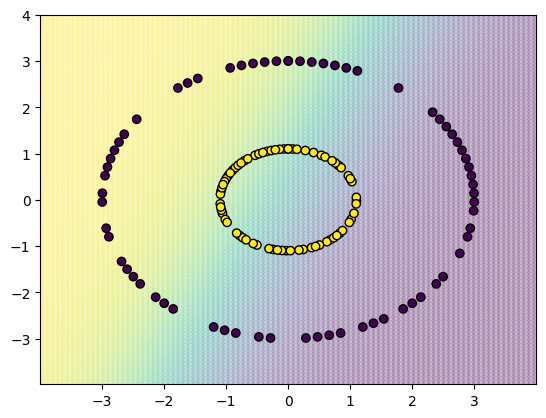

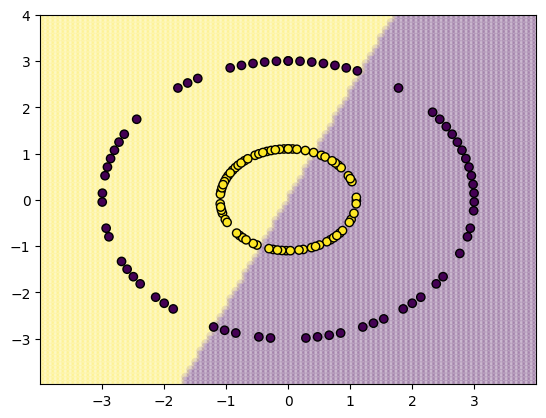

In [ ]:
def plot_model_prediction(prediction_func, X, Y, hard=True):
    u_min = X[:, 0].min() - 1
    u_max = X[:, 0].max() + 1
    v_min = X[:, 1].min() - 1
    v_max = X[:, 1].max() + 1

    U, V = np.meshgrid(np.linspace(u_min, u_max, 100), np.linspace(v_min, v_max, 100))
    UV = np.stack([U.ravel(), V.ravel()]).T
    c = prediction_func(UV).ravel()
    if hard:
        c = c > 0.5
    plt.scatter(UV[:, 0], UV[:, 1], c=c, edgecolors="none", alpha=0.15)
    plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), edgecolors="black")
    plt.xlim(left=u_min, right=u_max)
    plt.ylim(bottom=v_min, top=v_max)
    plt.show()


plot_model_prediction(lambda x: model.forward(x), X_train, Y_train, False)

plot_model_prediction(lambda x: model.forward(x), X_train, Y_train, True)

In [ ]:
# Now run the same experiment on 2 circles
X_train, Y_train, X_test, Y_test = split(*generate_2_gaussians(), 0.7)


## 2. Nearest Neighbors

---

### 🎯 Introduction

**k-Nearest Neighbors (k-NN)** is a **non-parametric** algorithm:
- Unlike Logistic Regression, there are **no trainable parameters**
- Classification based on similarity to training examples
- Predicts labels by "voting" among k nearest neighbors

**Algorithm:**
1. Find the k training samples most similar to the input
2. Predict the most frequent label among these k neighbors

**For this assignment:** We implement the simple case where **k = 1** (single nearest neighbor).

### 2.1 Distance to Training Samples

To find the nearest neighbor, we first compute distances from the input to all training samples.

**Distance metric:** [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance)

$$
d(x, y) = \sqrt{\sum_{i} (x_i - y_i)^2}
$$

In [ ]:
def w2_dist_to_training_samples(x_input, training_set):
    """Calculate distance between an input sample and the N training samples.
    # Arguments
        x_input: samples for which we want to make a predicton
            np.array of size `(n_in,)`
        training_set: all our training samples
            np.array of size `(N, n_in)`
    # Output
        The distances between our input samples and training samples
        np.array of size `(N,)`
    """
    distances = np.linalg.norm(training_set - x_input, axis=1)

    return distances

In [ ]:
am.test_student_function(
    username, w2_dist_to_training_samples, ["x_input", "training_set"]
)

Running local tests...
w2_dist_to_training_samples successfully passed local tests
Running remote test...
Test was successful. Congratulations!


### 2.2 Predicting a Label

**Steps:**
1. Find the nearest neighbor (training sample with minimum distance)
2. Predict by taking the label of this nearest neighbor

In [ ]:
def w2_nearest_neighbors(distances, training_labels):
    """Predict the label of the input sample given the distances of
        this sample to the training samples and the labels of the
        training samples.
    # Arguments
        distances: distances from the input sample to the N training samples
            np.array of size `(N,)`
        training_labels: true labels of the training samples
            np.array of size `(N,)`
    # Output
        prediction:
    """
    nearest_index = np.argmin(distances)
    prediction = training_labels[nearest_index]
    return prediction

In [ ]:
am.test_student_function(
    username, w2_nearest_neighbors, ["distances", "training_labels"]
)

Running local tests...
w2_nearest_neighbors successfully passed local tests
Running remote test...
Test was successful. Congratulations!


### 2.3 Experiment

Let's test the nearest neighbor method on our toy dataset.

In [ ]:
def nearest_neighbors_pred_label(x_input, training_set, training_labels):
    distances = w2_dist_to_training_samples(x_input, training_set)
    return w2_nearest_neighbors(distances, training_labels)


Y_pred = np.apply_along_axis(
    lambda x: nearest_neighbors_pred_label(x, X_train, Y_train), axis=1, arr=X_test
)
accuracy = ((Y_pred > 0.5) == Y_test).mean()

print(f"{100 * accuracy:.1f}%")

95.0%


### 💭 Discussion Question

**Why is there a large performance difference between logistic regression and nearest neighbors on the 2 circles dataset?**

Think about:
- What kind of decision boundaries can logistic regression learn?
- What kind of decision boundaries can nearest neighbors create?
- Which is better suited for circular patterns?

## 3. Decision Tree

---

### 🌳 Introduction

**Decision Trees** are **non-parametric** models (like k-NN):
- No trainable parameters to learn
- Create hierarchical decision rules
- Easy to interpret and visualize

**Example:** Credit Decision Tree

![Credit Decision Tree](images/creditdecisiontree.png)

**How it works:**
- Each node (except leaves) asks a question about features
- Navigate from root to leaf based on feature values
- Leaf nodes provide final predictions

**Features in the credit example:**
1. Checking account balance
2. Duration of requested credit
3. Payment status of previous loan
4. Length of current employment

### 🔨 Building a Decision Tree

**Construction algorithm** (starting from root node):

1. **Choose splitting criterion** - Select best feature and threshold
2. **Split dataset** - Divide into two groups based on criterion
3. **Add child nodes** - One for each split
4. **For each child, decide:**
   - **A:** Repeat from step 1 (create another split)
   - **B:** Make it a leaf node (predict by majority vote)

### 3.1 Entropy & Data Split

**Choosing good splitting rules:**

Two key criteria:
1. **Informativeness** - Does the rule help make decisions?
2. **Generalizability** - Will it work on unseen data?

Following [Occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor): simpler is better.

**Quality measure:** Weighted Entropy

$$
E(S) = \sum_{i\in \{L, R\}} \frac{|S_i|}{|S|} E(S_i)
$$

where $S_L$ and $S_R$ are left and right splits, and:

$$
E(S_i) = -\sum_{j=1}^n P_j \log_2 (P_j)
$$

- $P_j$ = fraction of class j in the split
- $n$ = number of classes (for binary: n = 2)
- **Lower entropy = better split**
- **Perfect split:** Entropy = 0 (all labels identical in each split)

In [ ]:
def w2_tree_weighted_entropy(Y_left, Y_right, classes):
    """Compute the weighted entropy.
    # Arguments
        Y_left: class labels of the data left set
            np.array of size `(n_objects, 1)`
        Y_right: class labels of the data right set
            np.array of size `(n_objects, 1)`
        classes: list of all class values
    # Output
        weighted_entropy: scalar `float`
    """
    # Calculate entropy for left split
    def entropy(Y):
        n = len(Y)
        if n == 0:
            return 0.0
        ent = 0.0
        for c in classes:
            p_c = np.sum(Y == c) / n
            if p_c > 0:
                ent -= p_c * np.log2(p_c)
        return ent
    left_entropy = entropy(Y_left)
    right_entropy = entropy(Y_right)
    n_left = len(Y_left)
    n_right = len(Y_right)
    weighted_entropy = (n_left * left_entropy + n_right * right_entropy) / (n_left + n_right)
    return weighted_entropy

In [ ]:
am.test_student_function(
    username, w2_tree_weighted_entropy, ["Y_left", "Y_right", "classes"]
)

Running local tests...
w2_tree_weighted_entropy successfully passed local tests
Running remote test...
Test was successful. Congratulations!


### 📂 Splitting Data

At each node, data is partitioned by a split criterion:
- **Left child:** Examples where feature < split_value
- **Right child:** Examples where feature ≥ split_value

Implement functions to return the appropriate subset for each child.

In [ ]:
def w2_tree_split_data_left(X, Y, feature_index, split_value):
    """Split the data `X` and `Y`, at the feature indexed by `feature_index`.
    If the value is less than `split_value` then return it as part of the left group.

    # Arguments
        X: np.array of size `(n_objects, n_in)`
        Y: np.array of size `(n_objects, 1)`
        feature_index: index of the feature to split at
        split_value: value to split between
    # Output
        (XY_left): np.array of size `(n_objects_left, n_in + 1)`
    """
    left_mask = X[:, feature_index] < split_value
    XY_left = np.hstack((X[left_mask], Y[left_mask]))
    return XY_left


def w2_tree_split_data_right(X, Y, feature_index, split_value):
    """Split the data `X` and `Y`, at the feature indexed by `feature_index`.
    If the value is greater or equal than `split_value` then return it as part of the right group.

    # Arguments
        X: np.array of size `(n_objects, n_in)`
        Y: np.array of size `(n_objects, 1)`
        feature_index: index of the feature to split at
        split_value: value to split between
    # Output
        (XY_left): np.array of size `(n_objects_left, n_in + 1)`
    """
    right_mask = X[:, feature_index] >= split_value
    XY_right = np.hstack((X[right_mask], Y[right_mask]))
    return XY_right

In [ ]:
am.test_student_function(
    username, w2_tree_split_data_left, ["X", "Y", "feature_index", "split_value"]
)

Running local tests...
w2_tree_split_data_left successfully passed local tests
Running remote test...
Test was successful. Congratulations!


In [ ]:
am.test_student_function(
    username, w2_tree_split_data_right, ["X", "Y", "feature_index", "split_value"]
)

Running local tests...
w2_tree_split_data_right successfully passed local tests
Running remote test...
Test was successful. Congratulations!


In [ ]:
am.get_progress(username)

| Current Assignment Grade 65%              |
| w1_L2_regression         | completed      |
| w1_cal_pseudoinverse     | completed      |
| w1_linear_forward        | completed      |
| w2_dist_to_training_samples| completed      |
| w2_linear_forward        | completed      |
| w2_linear_grad_W         | completed      |
| w2_linear_grad_b         | completed      |
| w2_nearest_neighbors     | completed      |
| w2_nll_forward           | completed      |
| w2_nll_grad_input        | completed      |
| w2_sigmoid_forward       | completed      |
| w2_sigmoid_grad_input    | completed      |
| w2_tree_split_data_left  | completed      |
| w2_tree_split_data_right | completed      |
| w2_tree_to_terminal      | not attempted  |
| w2_tree_weighted_entropy | completed      |
| w3_box_blur              | not attempted  |
| w3_conv_matrix           | not attempted  |
| w3_dense_forward         | not attempted  |
| w3_flatten_forward       | not attempted  |
| w3_l2_regularizer        | not

### 🔍 Finding the Best Split

We search for the split rule with lowest weighted entropy by:
- Trying all features
- Trying all possible split values
- Computing entropy for each combination
- Selecting the minimum

In [ ]:
def tree_best_split(X, Y):
    class_values = list(set(Y.flatten().tolist()))
    r_index, r_value, r_score = float("inf"), float("inf"), float("inf")
    r_XY_left, r_XY_right = (X, Y), (X, Y)
    for feature_index in range(X.shape[1]):
        for row in X:
            XY_left = w2_tree_split_data_left(X, Y, feature_index, row[feature_index])
            XY_right = w2_tree_split_data_right(X, Y, feature_index, row[feature_index])
            XY_left, XY_right = (XY_left[:, :-1], XY_left[:, -1:]), (
                XY_right[:, :-1],
                XY_right[:, -1:],
            )
            entropy = w2_tree_weighted_entropy(XY_left[1], XY_right[1], class_values)
            if entropy < r_score:
                r_index, r_value, r_score = feature_index, row[feature_index], entropy
                r_XY_left, r_XY_right = XY_left, XY_right
    return {
        "index": r_index,
        "value": r_value,
        "XY_left": r_XY_left,
        "XY_right": r_XY_right,
    }

### 3.2 Terminal Node (Leaf)

**Leaf nodes predict labels** by majority voting:
- Take all training labels that reached this leaf
- Return the most frequent label as the prediction

In [ ]:
def w2_tree_to_terminal(Y):
    """The most frequent class label, out of the data points belonging to the leaf node,
    is selected as the predicted class.

    # Arguments
        Y: np.array of size `(n_objects,1)`

    # Output
        label: most frequent label of `Y.dtype`
    """
    values, counts = np.unique(Y, return_counts=True)
    label = values[np.argmax(counts)]
    return label

In [ ]:
am.test_student_function(username, w2_tree_to_terminal, ["Y"])

Running local tests...
w2_tree_to_terminal successfully passed local tests
Running remote test...
Test was successful. Congratulations!


In [ ]:
am.get_progress(username)

| Current Assignment Grade 70%              |
| w1_L2_regression         | completed      |
| w1_cal_pseudoinverse     | completed      |
| w1_linear_forward        | completed      |
| w2_dist_to_training_samples| completed      |
| w2_linear_forward        | completed      |
| w2_linear_grad_W         | completed      |
| w2_linear_grad_b         | completed      |
| w2_nearest_neighbors     | completed      |
| w2_nll_forward           | completed      |
| w2_nll_grad_input        | completed      |
| w2_sigmoid_forward       | completed      |
| w2_sigmoid_grad_input    | completed      |
| w2_tree_split_data_left  | completed      |
| w2_tree_split_data_right | completed      |
| w2_tree_to_terminal      | completed      |
| w2_tree_weighted_entropy | completed      |
| w3_box_blur              | not attempted  |
| w3_conv_matrix           | not attempted  |
| w3_dense_forward         | not attempted  |
| w3_flatten_forward       | not attempted  |
| w3_l2_regularizer        | not

### 3.3 Build the Decision Tree

Recursively build the tree by greedily splitting at each node based on entropy.

**Preventing overfitting** - Convert to terminal node if:
1. **Maximum depth** is reached
2. Node has fewer than **minimum samples**

In [ ]:
def tree_recursive_split(X, Y, node, max_depth, min_size, depth):
    XY_left, XY_right = node["XY_left"], node["XY_right"]
    del node["XY_left"]
    del node["XY_right"]
    # check for a no split
    if XY_left[0].size <= 0 or XY_right[0].size <= 0:
        node["left_child"] = node["right_child"] = w2_tree_to_terminal(
            np.concatenate((XY_left[1], XY_right[1]))
        )
        return
    # check for max depth
    if depth >= max_depth:
        node["left_child"], node["right_child"] = w2_tree_to_terminal(
            XY_left[1]
        ), w2_tree_to_terminal(XY_right[1])
        return
    # process left child
    if XY_left[0].shape[0] <= min_size:
        node["left_child"] = w2_tree_to_terminal(XY_left[1])
    else:
        node["left_child"] = tree_best_split(*XY_left)
        tree_recursive_split(X, Y, node["left_child"], max_depth, min_size, depth + 1)
    # process right child
    if XY_right[0].shape[0] <= min_size:
        node["right_child"] = w2_tree_to_terminal(XY_right[1])
    else:
        node["right_child"] = tree_best_split(*XY_right)
        tree_recursive_split(X, Y, node["right_child"], max_depth, min_size, depth + 1)


def build_tree(X, Y, max_depth, min_size):
    root = tree_best_split(X, Y)
    tree_recursive_split(X, Y, root, max_depth, min_size, 1)
    return root

### 🖨️ Visualizing the Tree

Print split criteria or predicted classes at each node to understand decision-making.

**Prediction:** Recursively traverse from root to leaf node based on feature values.

In [ ]:
def print_tree(node, depth=0):
    if isinstance(node, dict):
        print("%s[X%d < %.3f]" % ((depth * " ", (node["index"] + 1), node["value"])))
        print_tree(node["left_child"], depth + 1)
        print_tree(node["right_child"], depth + 1)
    else:
        print("%s[%s]" % ((depth * " ", node)))


def tree_predict_single(x, node):
    if isinstance(node, dict):
        if x[node["index"]] < node["value"]:
            return tree_predict_single(x, node["left_child"])
        else:
            return tree_predict_single(x, node["right_child"])

    return node


def tree_predict_multi(X, node):
    Y = np.array([tree_predict_single(row, node) for row in X])
    return Y[:, None]  # size: (n_object,) -> (n_object, 1)

### 🧪 Testing the Decision Tree

Let's test on toy data. **Note:** Ensure your `w2_tree_weighted_entropy` function handles empty splits correctly.

In [ ]:
X_train, Y_train, X_test, Y_test = split(*generate_2_circles(), 0.7)

tree = build_tree(X_train, Y_train, 4, 1)
Y_pred = tree_predict_multi(X_test, tree)
test_accuracy = (Y_pred == Y_test).mean()
print("Test Acc: {:.1f}%".format(test_accuracy * 100))

Test Acc: 96.7%


**Tree structure** printed in [pre-order traversal](https://en.wikipedia.org/wiki/Tree_traversal#Pre-order_(NLR)):

In [ ]:
print_tree(tree)

[X2 < -1.099]
 [X1 < 2.138]
  [X1 < -1.375]
   [X1 < -1.701]
    [0.0]
    [0.0]
   [X1 < -1.375]
    [0.0]
    [0.0]
  [X1 < 2.138]
   [0.0]
   [0.0]
 [X2 < 1.246]
  [X1 < -1.099]
   [X1 < -2.936]
    [0.0]
    [0.0]
   [X1 < 2.802]
    [1.0]
    [0.0]
  [X1 < 2.070]
   [X1 < -2.328]
    [0.0]
    [0.0]
   [X1 < 2.070]
    [0.0]
    [0.0]


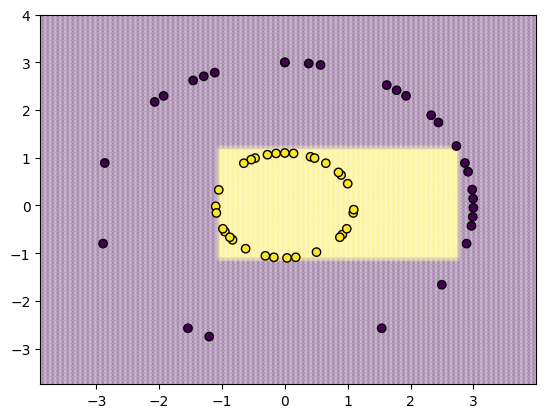

In [ ]:
plot_model_prediction(lambda x: tree_predict_multi(x, tree), X_test, Y_test)

## 4. Experiments

---

### 🏥 Cleveland Heart Disease Dataset

The [Cleveland Heart Disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) dataset predicts heart disease presence based on medical information.

**Dataset details:**
- Full database: 76 attributes
- **We use: 14 key attributes**

**Features (1-13):**

1. **Age** - Age in years 
2. **Sex** - 0 = female, 1 = male 
3. **Chest pain type:**
   - 1 = typical angina
   - 2 = atypical angina
   - 3 = non-anginal pain
   - 4 = asymptomatic
4. **Trestbps** - Resting blood pressure (mm Hg)
5. **Chol** - Serum cholesterol (mg/dl) 
6. **Fasting blood sugar** - > 120 mg/dl (0 = false, 1 = true)
7. **Resting ECG results:**
   - 0 = normal
   - 1 = ST-T wave abnormality
   - 2 = left ventricular hypertrophy
8. **Thalach** - Maximum heart rate achieved 
9. **Exercise induced angina** - 0 = no, 1 = yes
10. **Oldpeak** - ST depression (exercise vs. rest) 
11. **Slope** - Peak exercise ST segment slope:
    - 1 = upsloping, 2 = flat, 3 = downsloping 
12. **Ca** - Number of major vessels (0-3) colored by fluoroscopy 
13. **Thal:**
    - 3 = normal, 6 = fixed defect, 7 = reversible defect 

**Target (14):**
14. **Heart disease diagnosis** (angiographic disease status):
    - 0 = < 50% diameter narrowing (no disease)
    - 1 = > 50% diameter narrowing (disease present)

### 📦 Data Preparation

Helper functions for downloading and preprocessing are in `heart_disease_data.py`.

In [ ]:
import heart_disease_data

In [ ]:
X, Y = heart_disease_data.download_and_preprocess()
X_train, Y_train, X_test, Y_test = split(X, Y, 0.7)

### 👀 Exploring the Data

Let's examine some examples:

In [ ]:
print(X_train[0:2])
print(Y_train[0:2])

# TODO feel free to explore more examples and see if you can predict the presence of a heart disease

[[ 66.    1.    4.  160.  228.    0.    2.  138.    0.    2.3   1.    0.
    6. ]
 [ 35.    1.    4.  120.  198.    0.    0.  130.    1.    1.6   2.    0.
    7. ]]
[[0.]
 [1.]]


### 4.1 Decision Tree for Heart Disease Prediction

Let's build a decision tree and evaluate performance!

In [ ]:
# TODO: you are free to make use of code that we provide in previous cells
# TODO: play around with different hyper parameters and see how these impact your performance

tree = build_tree(X_train, Y_train, 5, 4)
Y_pred = tree_predict_multi(X_test, tree)
test_accuracy = (Y_pred == Y_test).mean()
print("Test Acc: {:.1f}%".format(test_accuracy * 100))

Test Acc: 73.3%


### 💡 Hyperparameter Tuning

**Question:** How did changing hyperparameters affect test performance?

**Note:** Hyperparameters should be tuned using a [validation set](https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets#Validation_dataset), not the test set, to avoid overfitting.

### 4.2 Nearest Neighbors for Heart Disease Prediction

Test k-NN with k=1 on the heart disease data:

In [ ]:
Y_pred = np.apply_along_axis(
    lambda x: nearest_neighbors_pred_label(x, X_train, Y_train), axis=1, arr=X_test
)
accuracy = ((Y_pred > 0.5) == Y_test).mean()

print(f"{100 * accuracy:.1f}%")

56.7%


### 4.3 Logistic Regression for Heart Disease Prediction

Train a logistic regression model to find correlations automatically.

In [ ]:
# TODO: you are free to make use of code that we provide in previous cells
# TODO: play around with different hyper parameters and see how these impact your performance

### 📊 Performance Analysis

**Question:** Was your model better than random guessing?

Let's check the empirical mean of the target variable:

In [ ]:
Y_train.mean()

np.float64(0.4927536231884058)

### 🔍 Investigating the Problem

Let's examine the learned parameters:

In [ ]:
print(model.W, model.b)

[[-1.4002896 ]
 [ 0.60038181]] [-0.02623178]


### 🎚️ Feature Scaling

**Observation:** Some weights are much larger than others after training.

**Analysis:**
- Compare weight initialization range
- Compare learning rate (step size)
- Compare input feature scales

**The problem:** Features have different scales!

**Solution:** [Feature Scaling](https://en.wikipedia.org/wiki/Feature_scaling)

Rescale input features so they have similar ranges. This helps gradient descent converge faster and more reliably.

In [ ]:
# TODO: Rescale the input features and train again

### 💭 Final Discussion Question

**Why didn't decision trees need feature scaling?**

Think about how decision trees make splits versus how gradient descent optimizes parameters.